#  Quantitative Risk Analysis and Prediction of FAANG Stock Performance


In this project, I will use pandas to analyze data, including value, risk and return metrics, of the prominent 'FAANG' companies: Facebook, Apple, Amazon, Netflix, and Google. Here are some of the questions I'll address in this notebook:


1. What was the change in our stock’s price over time?  
2. What was the moving average of our stocks?  
3. What was the daily return average of a stock?  
4. What was the correlation between daily returns of different stocks?  
5. How much value do we put at risk by investing in a particular stock?  
6. How can we attempt to predict future 'FAANG'-stock behavior?  

In [20]:
#Importing Libraries
from __future__ import division
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime
#Using yfinance to access Yahoo Historical Stocks
!pip install yfinance
import yfinance as yf

Comparing the five "FAANG" companies to analyze their average stock prices and returns to ultimately perform a risk assessment of the stocks in the last 365 days. 

In [21]:
stock_list = ['AAPL','GOOG','MSFT','AMZN','NFLX']

end = datetime.now()

#Start date set to 1 year back
start = datetime(end.year-1,end.month,end.day) 

for stock in stock_list:
    globals()[stock] = yf.download(stock,start,end) 

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Here I've listed simple statistics regarding the stock price of Netflix in the previous year.

In [22]:
NFLX.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,452.581280,458.359400,447.118961,452.688360,452.688360,5.551110e+06
std,84.432694,85.016282,83.874437,84.664446,84.664446,3.851564e+06
min,317.549988,323.609985,315.619995,317.549988,317.549988,1.404700e+06
25%,399.944992,406.534988,395.177498,399.410004,399.410004,3.507900e+06
50%,437.425003,441.739990,431.165009,437.760010,437.760010,4.526550e+06
75%,488.187492,491.900009,479.429993,486.017494,486.017494,6.175725e+06
max,633.210022,638.000000,623.159973,636.179993,636.179993,2.807440e+07


In [23]:
NFLX.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-04-10 to 2024-04-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


## Change in Stock Price Over Time

<Axes: xlabel='Date'>

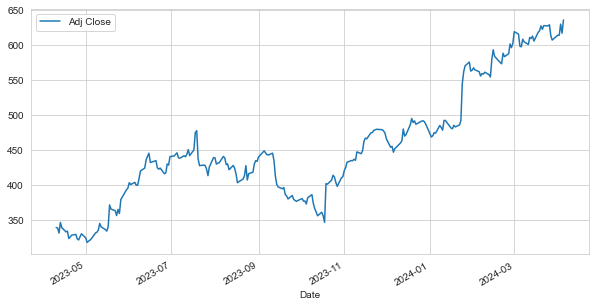

In [24]:
NFLX['Adj Close'].plot(legend = True, figsize = (10,5))

<Axes: xlabel='Date'>

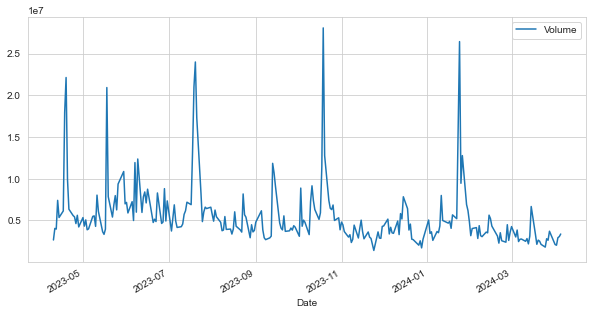

In [25]:
NFLX['Volume'].plot(legend = True, figsize = (10,5))

> After a strong first quarter, Netflix stock prices have shown a recovery, moving significantly upward from a notable low, rather than fluctuating around a single value. As for the trading volume, it has not decreased to a consistent level but has varied considerably with several spikes that suggest occasional days of very high trading activity
    
- The Adjusted Close Price graph shows a general upward trend over the time period displayed. 
    - Initially, the stock price experiences some volatility, with noticeable fluctuations up and down. 
    - However, after what appears to be a significant dip reaching its lowest point, the stock price begins a consistent ascent.
    - The upward trend suggests that the stock was recovering and gaining value, surpassing previous levels and reaching new heights by the end of the period shown. This indicates a period of positive growth for the stock.

- The trading volume graph exhibits a much more erratic behavior with spikes in volume at irregular intervals. 
    - These spikes may indicate specific events or announcements that caused a higher number of shares to be traded on those days.
    - Aside from these spikes, the volume does not show a clear trend upwards or downwards, but rather seems to fluctuate within a range with no discernible pattern of increase or decrease in the number of shares traded daily.
    - This erratic behavior could suggest that while there are days of high interest and trading activity, there isn't a consistent level of volume throughout the period.



Increase in the stock price does not seem to be directly correlated with consistent high volume. The high volume spikes do not necessarily align with the periods of stock price increase, indicating that the price growth might be driven by factors beyond just trading volume.


Now let's calculate a few different moving averages to smooth out variations in our data and obtain a better trend.

## Calculating Moving Averages

In [26]:
averages = [10,25,50]
for avg in averages:
    label = "MAvg for %s days" %(str(avg))
    NFLX[label] = NFLX['Adj Close'].rolling(window = avg, center = False).mean()

In [27]:
NFLX.tail()

,Open,High,Low,Close,Adj Close,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days
Date,,,,,,,,,
2024-04-01,608.000000,615.109985,605.570007,614.309998,614.309998,2115900,620.941010,611.326807,584.858403
2024-04-02,611.000000,615.030029,605.510010,614.210022,614.210022,2029200,620.523010,612.389207,587.483603
2024-04-03,612.750000,630.409973,611.500000,630.080017,630.080017,2931200,621.457013,613.525608,590.371003
2024-04-04,633.210022,638.000000,616.580017,617.140015,617.140015,3064300,620.402014,614.352009,592.870004
2024-04-05,624.919983,637.909973,622.710022,636.179993,636.179993,3372800,621.749011,615.682410,594.696204


<Axes: xlabel='Date'>

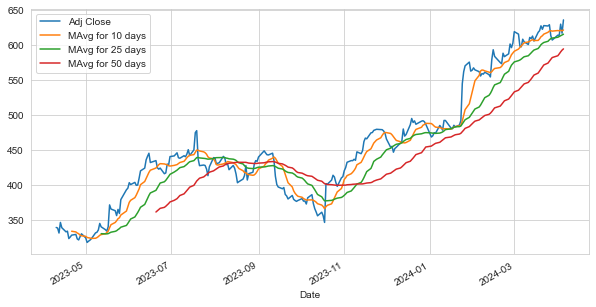

In [28]:
NFLX[['Adj Close', 'MAvg for 10 days', 'MAvg for 25 days', 'MAvg for 50 days']].plot(subplots = False, figsize = (10,5))

The 50-day moving average supports our observation that Netflix's stock is significantly moving upwards for the past 3 months. This plot also reveals the approximate crossover points that tell us when Netflix's stock trend is increasing or decreasing. Now let's calculate the average daily returns for Netflix's stock.

## Daily Return Averages.


In [29]:
#The daily return column can be created by using the percentage change over the adjusted closing price
NFLX['Daily Return'] = NFLX['Adj Close'].pct_change()
NFLX.tail()

,Open,High,Low,Close,Adj Close,Volume,MAvg for 10 days,MAvg for 25 days,MAvg for 50 days,Daily Return
Date,,,,,,,,,,
2024-04-01,608.000000,615.109985,605.570007,614.309998,614.309998,2115900,620.941010,611.326807,584.858403,0.011493
2024-04-02,611.000000,615.030029,605.510010,614.210022,614.210022,2029200,620.523010,612.389207,587.483603,-0.000163
2024-04-03,612.750000,630.409973,611.500000,630.080017,630.080017,2931200,621.457013,613.525608,590.371003,0.025838
2024-04-04,633.210022,638.000000,616.580017,617.140015,617.140015,3064300,620.402014,614.352009,592.870004,-0.020537
2024-04-05,624.919983,637.909973,622.710022,636.179993,636.179993,3372800,621.749011,615.682410,594.696204,0.030852


<Axes: xlabel='Date'>

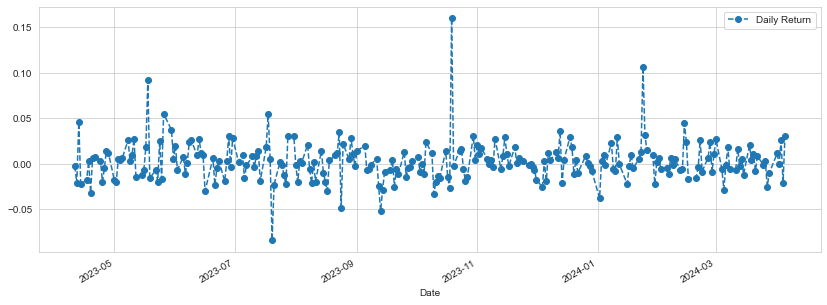

In [30]:
NFLX['Daily Return'].plot(figsize=(14,5),legend=True,linestyle='--',marker='o')

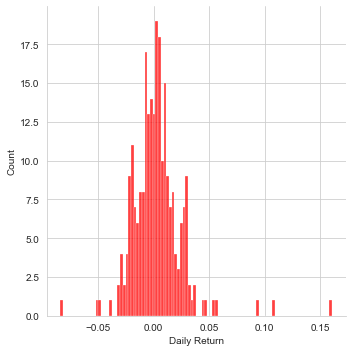

In [38]:
sns.displot(NFLX['Daily Return'].dropna(),bins=100,color='red')

Using Seaborn to plot our axes, we find that the distribution of daily returns is concentrated heavily around 0 with little skew toward positive or negative returns.

## Correlation Between Different Daily Stock Returns

Now let's examine the trend between some pairs of the 'FAANG' stocks using Seaborn's joint plot feature, using the percent change of daily returns.

In [39]:
close_compr = yf.download(stock_list,start,end)['Adj Close']
rets_compr = close_compr.pct_change()
rets_compr.tail()

[*********************100%%**********************]  5 of 5 completed


Ticker,AAPL,AMZN,GOOG,MSFT,NFLX
Date,,,,,
2024-04-01,-0.008456,0.003271,0.027847,0.009151,0.011493
2024-04-02,-0.006999,-0.001547,-0.004026,-0.007372,-0.000163
2024-04-03,0.004797,0.009519,0.003208,-0.002349,0.025838
2024-04-04,-0.004892,-0.013212,-0.028330,-0.006113,-0.020537
2024-04-05,0.004502,0.028167,0.013163,0.018283,0.030852


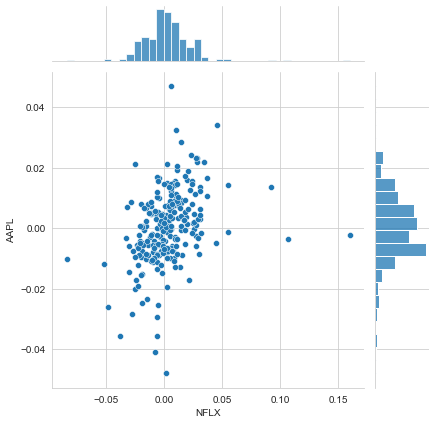

In [49]:
sns.jointplot(x='NFLX', y='AAPL', data=rets_compr, kind='scatter')


There seems to be a moderate correlation between Netflix and Apple returns. I'll generate all of the pairwise plots to see if there are any stronger correlations.

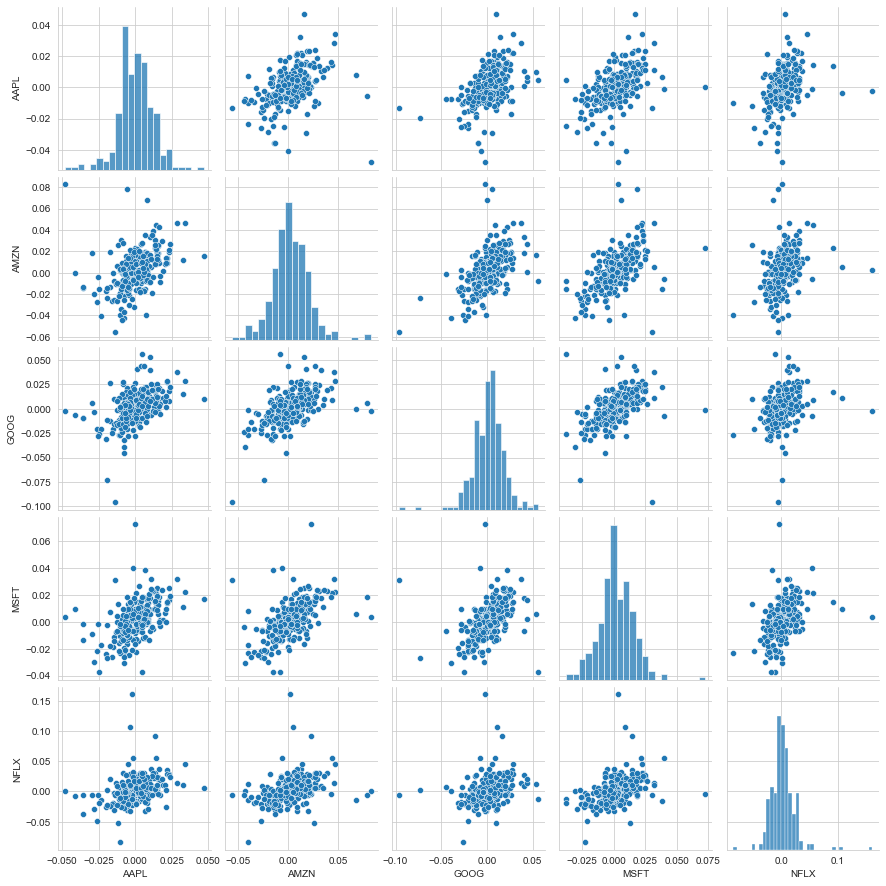

In [43]:
sns.pairplot(rets_compr.dropna())

There seems to be stronger correlations between Amazon and Microsoft, though to be sure we need another visualization tool. The correlation matrix plot, which allows us to view the pairwise confidence intervals together, is a great option for doing this.

Ticker      AAPL      AMZN      GOOG      MSFT      NFLX
Ticker                                                  
AAPL    1.000000  0.369327  0.465184  0.487100  0.353519
AMZN    0.369327  1.000000  0.535604  0.550709  0.345390
GOOG    0.465184  0.535604  1.000000  0.424137  0.306670
MSFT    0.487100  0.550709  0.424137  1.000000  0.396051
NFLX    0.353519  0.345390  0.306670  0.396051  1.000000


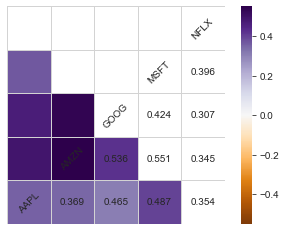

In [51]:
corr = rets_compr.corr()
print(corr)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots()

# Draw the heatmap with the mask and correct aspect ratio
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,len(corr)-(i+0.5), corr.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,len(corr)-(i+0.5),s, 
            ha="center", va="center")
ax.axis("off")
plt.show()

From the correlation heatmap, it becomes clear that Microsoft and Amazon share a stronger correlation, and in general
Microsoft maintains a strongest pairwise aggregate correlations compared to the rest of the 'FAANG' companies. Though perhaps expected, it is noteworthy that all five companies pairwise have moderate to strong positive correlation.

## Determining Value from Risk vs. Expected Return
Now we address the question of risk in buying stocks to compare these five companies.

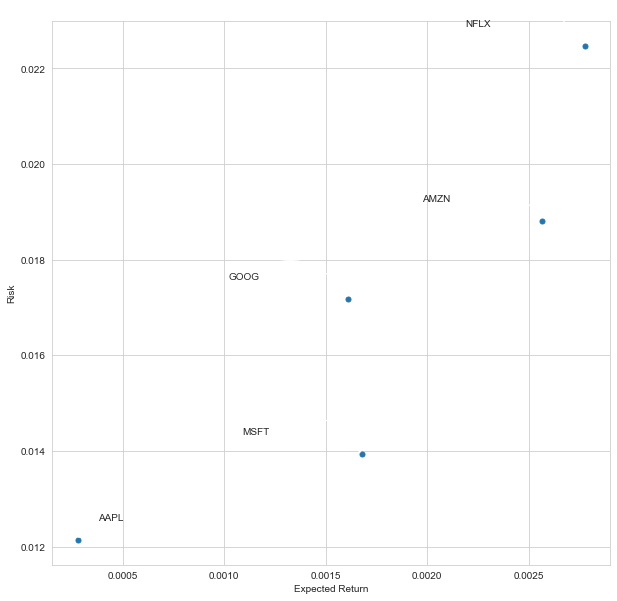

In [57]:
rets_filled = rets_compr.dropna()
plt.figure(figsize=(10,10))

plt.scatter(rets_filled.mean(),rets_filled.std(),s=25)

plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label,x,y in zip(rets_filled.columns,rets_filled.mean(),rets_filled.std()):
    if label == 'AAPL':
        xytext_value = (20, 20)
        connectionstyle_value = 'arc3,rad=0.3'
    else:
        xytext_value = (-120, 20)
        connectionstyle_value = 'arc3,rad=-0.5'
    
    plt.annotate(
        label,
        xy=(x,y), xytext=xytext_value,
        textcoords = 'offset points',
        arrowprops = dict(arrowstyle='->', connectionstyle=connectionstyle_value)
    )

plt.show()


From this plot we can see that Microsoft has the highest expected return and the lowest risk -- a sign that it is the best stock to buy at the moment. With its overhaul of its cloud computing sectors and high-profile acquisitions, Microsoft stock is a clear winner here. Netflix's performance is more concerning as it has virtually zero positive expected return along with the highest risk.

- From this plot, it appears that Apple (AAPL) has the lowest expected return as well as the lowest risk, which might interest risk-averse investors. 
- Microsoft (MSFT) falls somewhere in the middle range in terms of both risk and expected return, which may imply a more balanced risk-reward profile. 
- In contrast, Netflix (NFLX) is positioned with the highest expected return but also carries the highest risk, indicating a more volatile investment. 
- Amazon (AMZN) and Google (GOOG) show similar expected returns with moderate risk levels, slightly higher than Microsoft's. 
- While Microsoft has shown a solid performance, it is not the highest in terms of expected return according to this plot. Investment decisions should consider the latest strategic moves by these companies, including Microsoft's efforts in cloud computing and acquisitions, but based solely on this plot, Microsoft is not the clear winner as it does not have the highest expected return nor the absolute lowest risk.



We want to model an additional value-at-risk metric in order to assess the value at each risk confidence interval for these 5 companies. Let's try this two ways: bootstrapping and using Monte Carlo-GBM, with Google.

In [64]:
rets_compr.head()

Ticker,AAPL,AMZN,GOOG,MSFT,NFLX
Date,,,,,
2023-04-10,NaN,NaN,NaN,NaN,NaN
2023-04-11,-0.007591,-0.022022,-0.007761,-0.022668,-0.002301
2023-04-12,-0.004353,-0.020917,-0.008481,0.002333,-0.021229
2023-04-13,0.034104,0.046714,0.028227,0.022399,0.045796
2023-04-14,-0.002114,0.001074,0.011739,-0.012766,-0.021838


In [65]:
rets_compr['GOOG'].quantile(q=0.05)


-0.024384560259852826

In [66]:
rets_compr['GOOG'].quantile(q=0.01)



-0.042057573957188246

From the empirical quantiles given for both confience intervals, we know that the worst possible loss will not exceed 2.43 percent with 95% confidence and 4.20 percent with 99% confidence.

## Predicting Future Risk and Value of Stocks
We run the Monte Carlo Method on the GBM model to assess the stability and predict the future risk of our stocks. For this component, I'll be analyzing Google's stock.

In [67]:
days = 365

#delta t
dt = 1/365

mu = rets_compr.mean()['GOOG']

sigma = rets_compr.std()['GOOG']


def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        #Shock and drift formulas taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        #New price = Old price + Old price*(shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x]+shock[x]))
        
    return price

We’re going to run 100 Monte Carlo simulations of Google stocks. Here's the stock's opening values again.



In [69]:
GOOG.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-04-01,151.830002,157.000000,151.649994,156.500000,156.500000,24469800
2024-04-02,154.750000,155.990005,153.460007,155.869995,155.869995,17598100
2024-04-03,154.919998,156.550003,154.132004,156.369995,156.369995,17266200
2024-04-04,155.080002,156.179993,151.880005,151.940002,151.940002,24184800
2024-04-05,151.679993,154.839996,151.080994,153.940002,153.940002,16289800


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

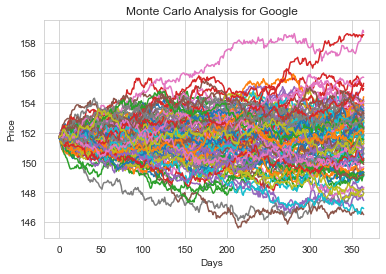

In [70]:
start_price = 151.68 #Taken from above

for run in range(1,100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

Text(0.5, 1.0, 'Final price distribution for Google Stock after 365 days')

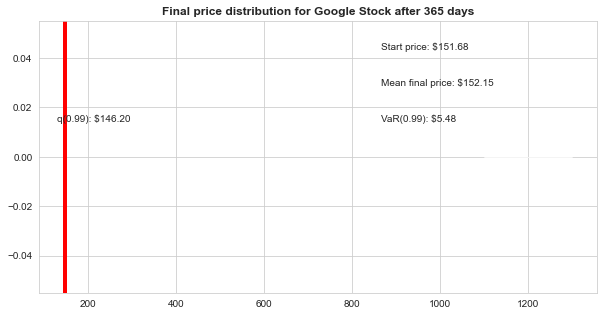

In [72]:
runs = 10000
plt.figure(figsize=(10,5))

simulations = np.zeros(runs)

for run in range(1,runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
q = np.percentile(simulations,1)

plt.hist(simulations,bins=200,range = [1100,1300])

plt.figtext(0.6,0.8,s="Start price: $%.2f" %start_price)

plt.figtext(0.6,0.7,"Mean final price: $%.2f" % simulations.mean())

plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price -q,))

plt.figtext(0.15,0.6, "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(u"Final price distribution for Google Stock after %s days" %days, weight='bold')


#### Decision - Based on the plot, we conclude that Google's stock price projection over 365 days suggests relative stability, with a small \$0.47 difference between the start price of \$151.68 and the mean final price of $152.15. The value-at-risk (VaR) at the 99\% confidence level is \$5.48, indicating that the stock price could potentially drop as low as \$146.20. This represents a 3.6% risk of loss, which is relatively low compared to the 6.5\% risk calculated using the bootstrapping method. The Monte Carlo simulation suggests that Google's stock is relatively stable and has a low risk of significant loss over the next year.